# [Part 1](https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib notebook

In [ ]:

mnist = tf.keras.datasets.mnist  # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)



model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))    # relu as good default
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # softmax for prob distr

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

In [ ]:
plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

print(x_train[0])

In [ ]:
model.save('deep_learning_intro.model')

In [ ]:
new_model = tf.keras.models.load_model('deep_learning_intro.model')

In [ ]:
predictions = new_model.predict(x_test)

In [ ]:
print(predictions)

In [ ]:
import numpy as np

print(np.argmax(predictions[0]))

In [ ]:
predictions[0]

In [ ]:
plt.figure()
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

# [Part 2](https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

%matplotlib notebook

<IPython.core.display.Javascript object>


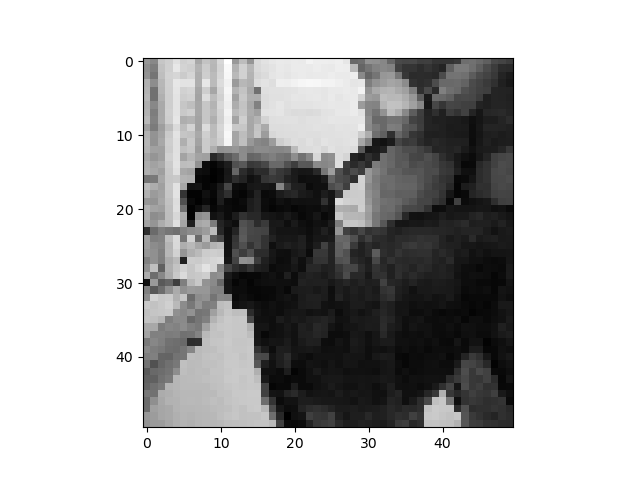

In [9]:
DATADIR = 'pet_images/'
CATEGORIES = ['dog', 'cat']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img),
                               cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [10]:
print(img_array.shape)

(375, 500)


<IPython.core.display.Javascript object>


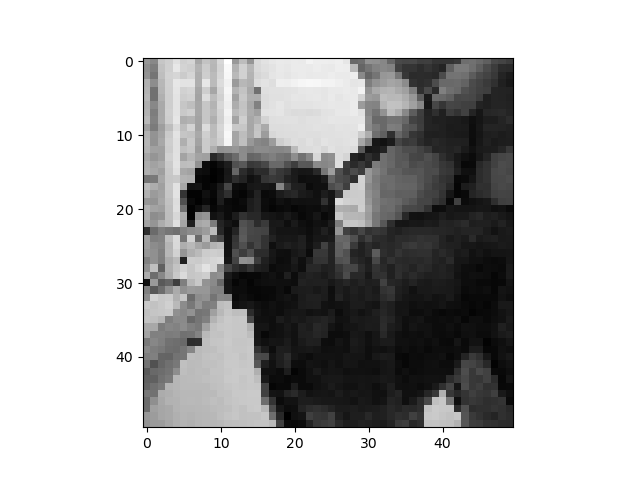

In [15]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.figure()
plt.imshow(new_array, cmap='gray')
plt.show()

In [23]:
training_data = []
IMG_SIZE = 50

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [24]:
print(len(training_data))

24946


In [25]:
import random

random.shuffle(training_data)

In [28]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
1
0
0
0
0
0


In [36]:
X = []
y = []

In [37]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
# X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)